# Micro-Credit Defaulter Model

Problem Statement: 

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 

Exercise:

Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

Points to Remember:

  •There are no null values in the dataset. 
    
  •There may be some customers with no loan history. 
    
  •The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.
    
  •For some features, there may be values which might not be realistic. You may have to observe them and treat them with a suitable explanation.
    
  •You might come across outliers in some features which you need to handle as per your understanding. Keep in mind that data is expensive and we cannot lose more than 7-8% of the data.  


In [1]:
# Importing necesssary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading Dataset
df=pd.read_csv("Data file.csv")

In [3]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
# Removing the First Column that's the S.No.
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [5]:
#Checking rows and columns
df.shape

(209593, 36)

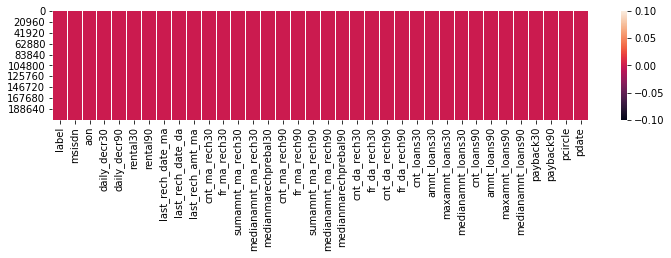

In [6]:
# Let's have a look at the null values
plt.figure(figsize=(12,2))
sns.heatmap(df.isnull())
# validated there are no null values

In [7]:
# Let's look at the datatypes
print("Data types:\n",30 * '-')
print(df.dtypes)

Data types:
 ------------------------------
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              in

 Not Defaulted = 183431

 Defaulted = 26162

 Proportion of Defaulted to Not Defaulted = 14.26258375083819 %


1    0.875177
0    0.124823
Name: label, dtype: float64

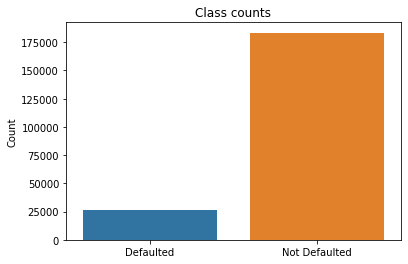

In [8]:
# Let's Get number of defaulters(0) and non-defaulters(1)
pos = df[df["label"] == 1].shape[0]
neg = df[df["label"] == 0].shape[0]
print(" Not Defaulted =", pos)
print("\n Defaulted =",neg)
print("\n Proportion of Defaulted to Not Defaulted =", neg / pos * 100, "%")
plt.figure(figsize=(6, 4))
sns.countplot(df["label"])
plt.xticks((0, 1), ["Defaulted", "Not Defaulted"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts")
df['label'].value_counts(normalize=True)

In [9]:
# Describing the dataset
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


There seem to be negative values for columns like aon, i.e. age on network and others as well, which seems unlikely.

Also, some values are very large.

Columns like maxamnt_loans30 etc should have values 0 or 6 or 12 bur we see other values as well.

I'll try to treat them later using outlier detection.

In [10]:
# Describing object types
df.describe(include='object')
# pcircle seems to have only one unique value = 'UPW'. Let's get rid of this row too.

,msisdn,pcircle,pdate
count,209593,209593,209593
unique,186243,1,82
top,04581I85330,UPW,2016-07-04
freq,7,209593,3150


In [11]:
df.drop('pcircle',axis=1,inplace=True)

In [12]:
# I'm also removing pdate as it isn't defined well as which date it refers to
df.drop('pdate',axis=1,inplace=True)

In [13]:
# Now, Mobile number of user doesn't really effect if the person will be a defaulter
df.drop('msisdn',axis=1,inplace=True)

In [14]:
df.shape

(209593, 33)

In [15]:
df.head(25)

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
5,1,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,1539,4,...,3,18,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333
6,1,545.0,2876.641667,2883.970000,335.75,402.90,13.0,0.0,5787,1,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
7,1,768.0,12905.000000,17804.150000,900.35,2549.11,4.0,55.0,3178,3,...,3,18,6.0,0.0,7.0,42,6,0.0,6.000000,3.857143
8,1,1191.0,90.695000,90.695000,2287.50,2287.50,1.0,0.0,1539,4,...,4,24,6.0,0.0,4.0,24,6,0.0,2.666667,2.666667
9,1,536.0,29.357333,29.357333,612.96,612.96,11.0,0.0,773,1,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

# maxamnt_loans30:
As per definition this variable should be 6 or 12 or maybe 0 as some have no loan history. But we find other values also. Let's find the count

In [17]:
df['maxamnt_loans30'].value_counts()

6.000000        179193
12.000000        26109
0.000000          3244
59275.166722         1
68599.755670         1
                 ...  
26462.333521         1
53666.885900         1
67319.013426         1
36610.121211         1
28708.879352         1
Name: maxamnt_loans30, Length: 1050, dtype: int64

In [18]:
print("Percent of wrong data is:",(209593-179193-26109-3244)/209593*100," %")

Percent of wrong data is: 0.49953958386014796  %


Let's get rid of these rows to avoid errors. Let's also validate for maxamnt_loans90 first.

In [19]:
df['maxamnt_loans90'].value_counts()

6     180945
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64

In [20]:
df.drop(df[(df['maxamnt_loans30'] != 0) & (df['maxamnt_loans30'] != 6) & (df['maxamnt_loans30'] != 12)].index, inplace = True)
# Let's drop the required rows

In [21]:
df['maxamnt_loans30'].value_counts()

6.0     179193
12.0     26109
0.0       3244
Name: maxamnt_loans30, dtype: int64

In [22]:
df.shape

(208546, 33)

In [23]:
# Similarly Median amounts should also be discrete and not continous. Let's check
df['medianamnt_loans90'].value_counts()

0.0    196460
1.0      6120
0.5      5638
2.0       306
1.5        19
3.0         3
Name: medianamnt_loans90, dtype: int64

In [24]:
# We'll define these 4 columns that is, 'medianamnt_loans90','maxamnt_loans90','medianamnt_loans30', 'maxamnt_loans30' as 
# categorical values
# And all others as continous

cat=['medianamnt_loans90','maxamnt_loans90','medianamnt_loans30', 'maxamnt_loans30']

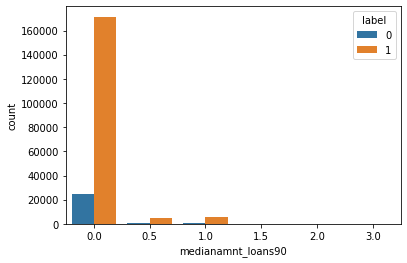

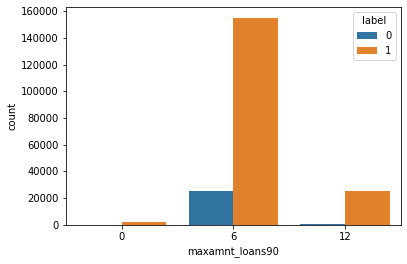

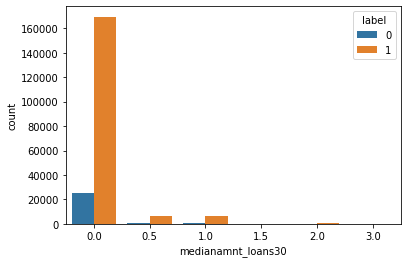

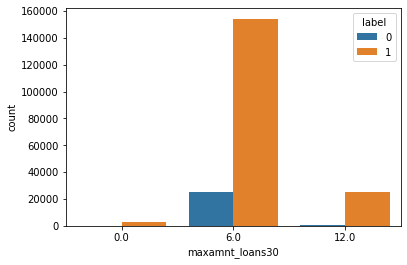

In [25]:
for i in cat:
    sns.countplot(i,hue='label',data=df)
    plt.show()

Max amt for both 30 and 90 days are more for 6, i.e 5

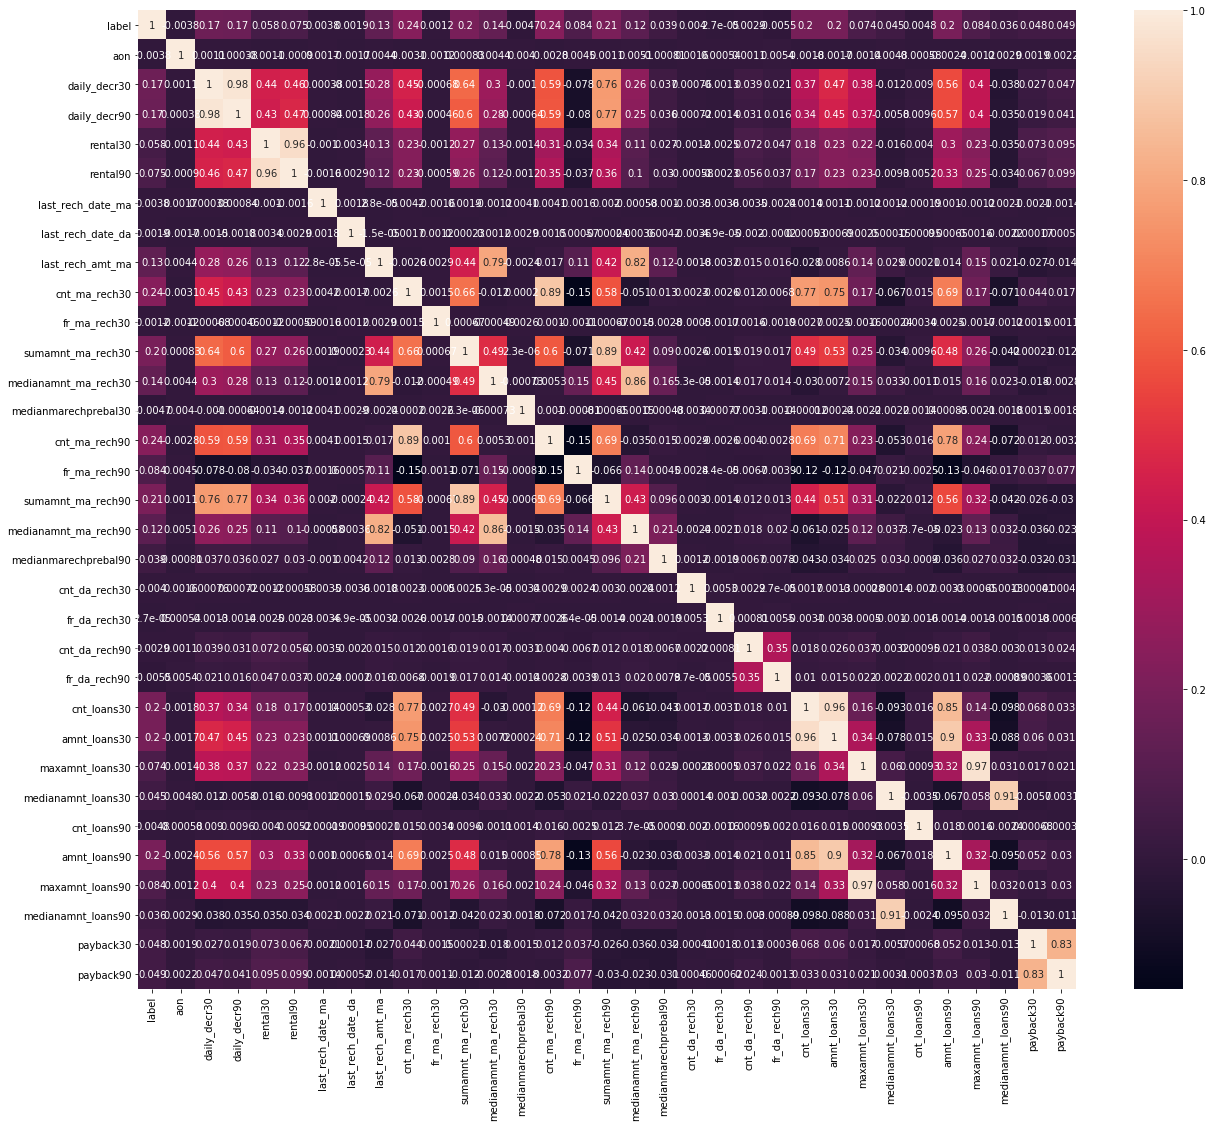

In [26]:
# Now, let's have a look at the correlation heatmap
plt.figure(figsize=(21,18))
sns.heatmap(df.corr(),annot=True)

We can see that there is strong positive as well as negative correlation within features, and we'll use PCA later to eliminate the curse of dimensionality as well

In [27]:
# Dropping daily_decr90 as it has very high correlation with daily_decr30
df.drop('daily_decr90',axis=1,inplace=True)
# Dropping rental90 as it has very high correlation with rental30
df.drop('rental90',axis=1,inplace=True)
# Dropping amnt_loans30 as it has very high correlation with cnt_loans30
df.drop('amnt_loans30',axis=1,inplace=True)
# Dropping maxamnt_loans90 as it has very high correlation with maxamnt_loans30
df.drop('maxamnt_loans90',axis=1,inplace=True)
# Dropping medianamnt_loans90 as it has very high correlation with medianamnt_loans30
df.drop('medianamnt_loans90',axis=1,inplace=True)

In [28]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'rental30', 'last_rech_date_ma',
       'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_da_rech30', 'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90',
       'cnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'payback30', 'payback90'],
      dtype='object')

In [29]:
df.shape

(208546, 28)

In [30]:
# Treating for outliers
from scipy.stats import zscore
z = abs(zscore(df))
print(df.shape)
df1=df[(z<3).all(axis=1)]
print(df1.shape)

# A lot of rows removed
(208546-161797)/208546*100

(208546, 28)
(161797, 28)


22.41663709685153

In [31]:
# Treating for outliers
from scipy.stats import zscore
z = abs(zscore(df))
print(df.shape)
df1=df[(z<6).all(axis=1)]
print(df1.shape)

# Fewer rows removed
(208546-194008)/208546*100

# Let's use 6

(208546, 28)
(194008, 28)


6.971123876746617

In [32]:
df=df[(z<6).all(axis=1)]
print(df.shape)

(194008, 28)


In [33]:
df.head()

,label,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,payback30,payback90
0,0,272.0,3055.050000,220.13,2.0,0.0,1539,2,21.0,3078.0,...,0.0,0,0,2,6.0,0.0,2.0,12,29.000000,29.000000
1,1,712.0,12122.000000,3691.26,20.0,0.0,5787,1,0.0,5787.0,...,0.0,0,0,1,12.0,0.0,1.0,12,0.000000,0.000000
2,1,535.0,1398.000000,900.13,3.0,0.0,1539,1,0.0,1539.0,...,0.0,0,0,1,6.0,0.0,1.0,6,0.000000,0.000000
3,1,241.0,21.228000,159.42,41.0,0.0,947,0,0.0,0.0,...,0.0,0,0,2,6.0,0.0,2.0,12,0.000000,0.000000
4,1,947.0,150.619333,1098.90,4.0,0.0,2309,7,2.0,20029.0,...,0.0,0,0,7,6.0,0.0,7.0,42,2.333333,2.333333


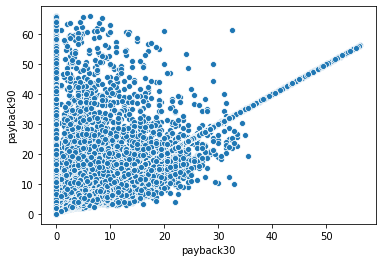

In [34]:
# Let's see the correlation between payback30 and payback90 with the help of scatter plot
sns.scatterplot(df['payback30'],df['payback90'])

A lot of data points are correlated strongly, but there are also a few anomalies

(array([38782., 47960., 32986., 24684., 18599., 15019.,  6783.,  5712.,
         2744.,   739.]),
 array([ -48. ,  200.8,  449.6,  698.4,  947.2, 1196. , 1444.8, 1693.6,
        1942.4, 2191.2, 2440. ]),
 <a list of 10 Patch objects>)

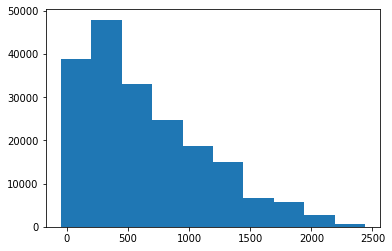

In [35]:
plt.hist(df['aon'])

(array([ 1363.,   108.,    93.,     0., 14416., 42873., 46488., 44271.,
        33374., 11022.]),
 array([-3.63424119, -1.92455397, -0.21486675,  1.49482047,  3.20450769,
         4.9141949 ,  6.62388212,  8.33356934, 10.04325656, 11.75294378,
        13.46263099]),
 <a list of 10 Patch objects>)

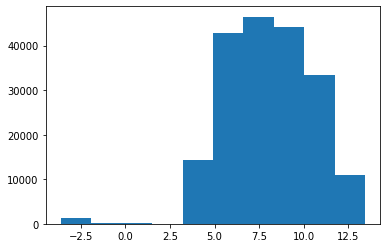

In [36]:
df1=np.cbrt(df['aon'])
plt.hist(df1)

In [37]:
df.head()

,label,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,payback30,payback90
0,0,272.0,3055.050000,220.13,2.0,0.0,1539,2,21.0,3078.0,...,0.0,0,0,2,6.0,0.0,2.0,12,29.000000,29.000000
1,1,712.0,12122.000000,3691.26,20.0,0.0,5787,1,0.0,5787.0,...,0.0,0,0,1,12.0,0.0,1.0,12,0.000000,0.000000
2,1,535.0,1398.000000,900.13,3.0,0.0,1539,1,0.0,1539.0,...,0.0,0,0,1,6.0,0.0,1.0,6,0.000000,0.000000
3,1,241.0,21.228000,159.42,41.0,0.0,947,0,0.0,0.0,...,0.0,0,0,2,6.0,0.0,2.0,12,0.000000,0.000000
4,1,947.0,150.619333,1098.90,4.0,0.0,2309,7,2.0,20029.0,...,0.0,0,0,7,6.0,0.0,7.0,42,2.333333,2.333333


(array([139877.,  27415.,  13199.,   6533.,   3334.,   1741.,    952.,
           521.,    273.,    163.]),
 array([-4.62150000e+01,  6.02160650e+03,  1.20894280e+04,  1.81572495e+04,
         2.42250710e+04,  3.02928925e+04,  3.63607140e+04,  4.24285355e+04,
         4.84963570e+04,  5.45641785e+04,  6.06320000e+04]),
 <a list of 10 Patch objects>)

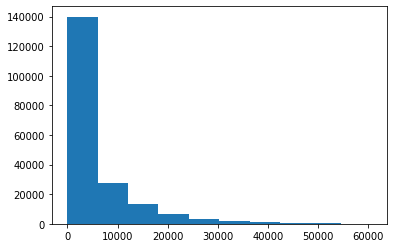

In [38]:
plt.hist(df['daily_decr30'])

(array([ 6875., 65238., 15861., 22957., 26746., 25440., 17814.,  8903.,
         3264.,   910.]),
 array([-3.58862148,  0.69880586,  4.9862332 ,  9.27366055, 13.56108789,
        17.84851523, 22.13594258, 26.42336992, 30.71079726, 34.99822461,
        39.28565195]),
 <a list of 10 Patch objects>)

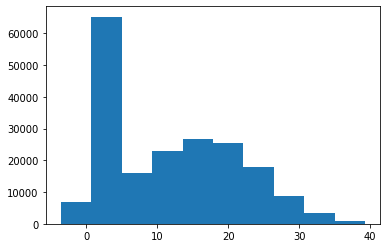

In [39]:
df1=np.cbrt(df['daily_decr30'])
plt.hist(df1)

In [40]:
# As we see, most of the data is not normalized, let's do a cube root transform on the continous features
cont=df.columns.drop(['medianamnt_loans30', 'maxamnt_loans30','label'])
cont

Index(['aon', 'daily_decr30', 'rental30', 'last_rech_date_ma',
       'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_da_rech30', 'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90',
       'cnt_loans30', 'cnt_loans90', 'amnt_loans90', 'payback30', 'payback90'],
      dtype='object')

In [41]:
for i in cont:
    df[i]=np.cbrt(df[i])

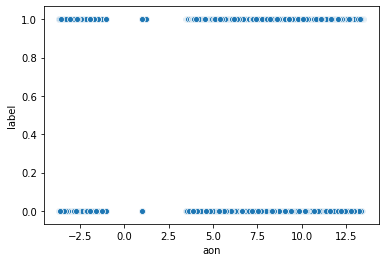

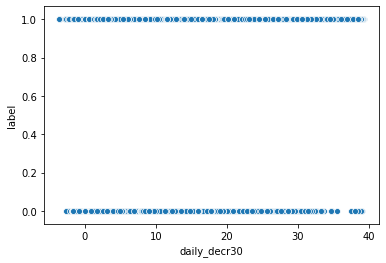

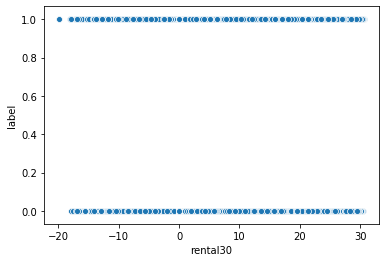

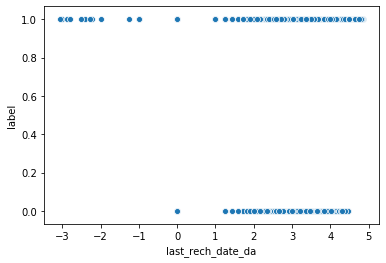

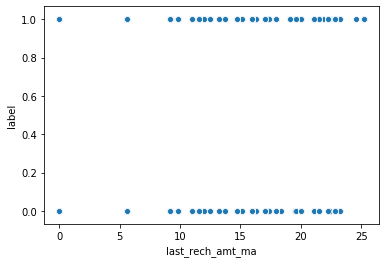

In [78]:
# Let's Look at all the scatterplots of some features
cols=['aon', 'daily_decr30', 'rental30','last_rech_date_da', 'last_rech_amt_ma']
for i in cols:
    sns.scatterplot(x=i,y='label',data=df)
    plt.show()

In [42]:
# Let's Separate our dataset into Features and target
x=df.drop(columns=["label"])
y=df[["label"]]

In [43]:
 # Let's do Standard Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [44]:
# PCA is required for the analysis to reduce curse of Dimensionality
from sklearn.decomposition import PCA
for i in range(5,27):
    pca = PCA(n_components=i)
    x_pca=pca.fit_transform(x)
    print(i," variance :{}".format(np.sum(pca.explained_variance_ratio_)))

5  variance :0.6276042869894303
6  variance :0.6740229408963544
7  variance :0.7137503053244043
8  variance :0.750914367803894
9  variance :0.7875127507688465
10  variance :0.8233188082798438
11  variance :0.8557116504063724
12  variance :0.8856664090344445
13  variance :0.911382845374971
14  variance :0.9275965810501385
15  variance :0.9430961917130867
16  variance :0.9560662064135129
17  variance :0.9643034902263184
18  variance :0.9724067207013108
19  variance :0.9785817041524806
20  variance :0.9827929180712861
21  variance :0.9868595737650798
22  variance :0.9903650175927697
23  variance :0.9936009668638355
24  variance :0.9963047840282063
25  variance :0.9985830943800199
26  variance :0.9997886037303123


In [45]:
# We find that after 15 the variance is >95%. Let's use n=15
pca = PCA(n_components=15)
x=pca.fit_transform(x)

# Modelling

Let's first find out the best performing model and we'll optimize and tune it later

In [46]:
#since it is imbalanced dataset so we will focus on auc-roc score and use SMOTE. Importing Libraries

from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [47]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 43,test_size=0.20,stratify=y)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
lg.fit(x_train,y_train)
y_pred = lg.predict(x_test)
aucroc_scr=roc_auc_score(y_test,y_pred)
print(aucroc_scr)

0.7638795887428276


In [48]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
aucroc_scr=roc_auc_score(y_test,y_pred)
print(aucroc_scr)

0.7510394046282167


In [49]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
aucroc_scr=roc_auc_score(y_test,y_pred)
print(aucroc_scr)

0.7408223511842477


In [50]:
# SVC
# from sklearn.svm import SVC
# svc=SVC()
# svc.fit(x_train,y_train)
# y_pred = svc.predict(x_test)
# aucroc_scr=roc_auc_score(y_test,y_pred)
# print(aucroc_scr)

In [51]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)
aucroc_scr=roc_auc_score(y_test,y_pred)
print(aucroc_scr)

0.7058151148366807


In [52]:
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
aucroc_scr=roc_auc_score(y_test,y_pred)
print(aucroc_scr)

0.7804499834881616


In [53]:
# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
y_pred = ad.predict(x_test)
aucroc_scr=roc_auc_score(y_test,y_pred)
print(aucroc_scr)

0.7678362660881648


In [54]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)
aucroc_scr=roc_auc_score(y_test,y_pred)
print(aucroc_scr)

0.7025400674947676


In [55]:
# xgBoostClassifier
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(x_train,y_train)
y_pred = xg.predict(x_test)
aucroc_scr=roc_auc_score(y_test,y_pred)
print(aucroc_scr)

0.7909400225059909


In [69]:
# This function will find maximum aucroc
def max_aucroc_score(clf,df_x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        x_train, y_train = SMOTE().fit_sample(x_train, y_train)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        print("auc roc score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [57]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="roc_auc")
    print("Mean ROC_AUC score for classifier: ",c_scores.mean())
    print("standard deviation in ROC_AUC score for classifier: ",c_scores.std())
    print(c_scores)

# Cross Validation

In [58]:

print("\n\nRandom Forest Classifier\n\n")
model_evaluation(rfc,x,y)

print("\n\nKNN Classifier\n\n")
model_evaluation(knn,x,y)

print("\n\nDecisionTree Classifier\n\n")
model_evaluation(dtc,x,y)

print("\n\nLogistic Regression Classifier\n\n")
model_evaluation(lg,x,y)

print("\n\nGaussian NB Classifier\n\n")
model_evaluation(gnb,x,y)

print("\n\nGradient Boost\n\n")
model_evaluation(gb,x,y)

print("\n\nAdaboost Classifier\n\n")
model_evaluation(ad,x,y)

print("\n\nXGBoostClassifier\n\n")
model_evaluation(xg,x,y)



Random Forest Classifier


Mean ROC_AUC score for classifier:  0.8691888881541587
standard deviation in ROC_AUC score for classifier:  0.0019453576794263567
[0.86812682 0.86639525 0.87206196 0.87047151 0.8688889 ]


KNN Classifier


Mean ROC_AUC score for classifier:  0.8009490710658633
standard deviation in ROC_AUC score for classifier:  0.0037918211885474883
[0.79823678 0.79618058 0.80374006 0.80668571 0.79990224]


DecisionTree Classifier


Mean ROC_AUC score for classifier:  0.6792487917762691
standard deviation in ROC_AUC score for classifier:  0.003029115795545029
[0.67756418 0.67457708 0.67923225 0.68310903 0.68176141]


Logistic Regression Classifier


Mean ROC_AUC score for classifier:  0.8331919164684749
standard deviation in ROC_AUC score for classifier:  0.0016801064814120116
[0.83496282 0.83010498 0.83324385 0.83325525 0.83439268]


Gaussian NB Classifier


Mean ROC_AUC score for classifier:  0.7925785133876686
standard deviation in ROC_AUC score for classifier:  0.00252

# Hyper Parameter Tuning - XGBoost Classifier

In [60]:
from sklearn.model_selection import RandomizedSearchCV
xg=XGBClassifier()
parameters = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }
clf = RandomizedSearchCV(xg, parameters, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'min_child_weight': 7,
 'max_depth': 12,
 'learning_rate': 0.05,
 'gamma': 0.4,
 'colsample_bytree': 0.5}

In [70]:
xg=XGBClassifier(learning_rate=0.05,max_depth=12,min_child_weight=7,gamma=0.4,colsample_bytree=0.5)
max_aucroc_score(xg,x,y)

auc roc score corresponding to  42  is  0.7862813926158363
auc roc score corresponding to  43  is  0.7883695926630294
auc roc score corresponding to  44  is  0.7846025077689758
auc roc score corresponding to  45  is  0.7864522216145402
auc roc score corresponding to  46  is  0.7883481823852551
auc roc score corresponding to  47  is  0.7894555705373114
auc roc score corresponding to  48  is  0.7895935861551753
auc roc score corresponding to  49  is  0.7858063962670048
auc roc score corresponding to  50  is  0.7838193557032848
auc roc score corresponding to  51  is  0.7865788341293388
auc roc score corresponding to  52  is  0.7829551310192975
auc roc score corresponding to  53  is  0.784832310208493
auc roc score corresponding to  54  is  0.7890877706088697
auc roc score corresponding to  55  is  0.7891634770610176
auc roc score corresponding to  56  is  0.7859263192030574
auc roc score corresponding to  57  is  0.7856911505973921
auc roc score corresponding to  58  is  0.783130655413381

63

# Final Model: XGBoostClassifier

Confusion matrix 
 [[ 3578  1300]
 [ 5102 28822]]
classification report 
               precision    recall  f1-score   support

           0       0.41      0.73      0.53      4878
           1       0.96      0.85      0.90     33924

    accuracy                           0.84     38802
   macro avg       0.68      0.79      0.71     38802
weighted avg       0.89      0.84      0.85     38802

AUC_Score: 0.7915511671918983
[0 1 0 ... 1 1 1]


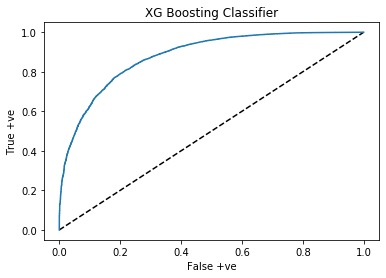

In [71]:
xg=XGBClassifier(learning_rate=0.05,max_depth=12,min_child_weight=7,gamma=0.4,colsample_bytree=0.5)
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 63,test_size=0.20,stratify=y)

x_train, y_train = SMOTE().fit_sample(x_train, y_train)

xg.fit(x_train,y_train)
y_pred = xg.predict(x_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score

print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print('AUC_Score:',roc_auc_score(y_test,y_pred))
y_pred_prob=xg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='XG Boosting Classifier')
plt.xlabel('False +ve')
plt.ylabel('True +ve')
plt.title('XG Boosting Classifier')
plt.show
print(y_pred)

In [74]:
import joblib
joblib.dump(xg,'Micro_Credit_Defaulter.pkl')

['Micro_Credit_Defaulter.pkl']